## 5. Методы машинного обучения: продвинутый уровень

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [195]:
data = pd.read_csv("https://stepik.org/media/attachments/lesson/802033/students.csv")

### 5.1 Решающие деревья

#### Задача классификации

In [4]:
from sklearn import tree

In [12]:
df_cut = (
    data[["Growth", "Weight", "Sex", "Hair length", "Children number"]].copy().dropna()
)

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

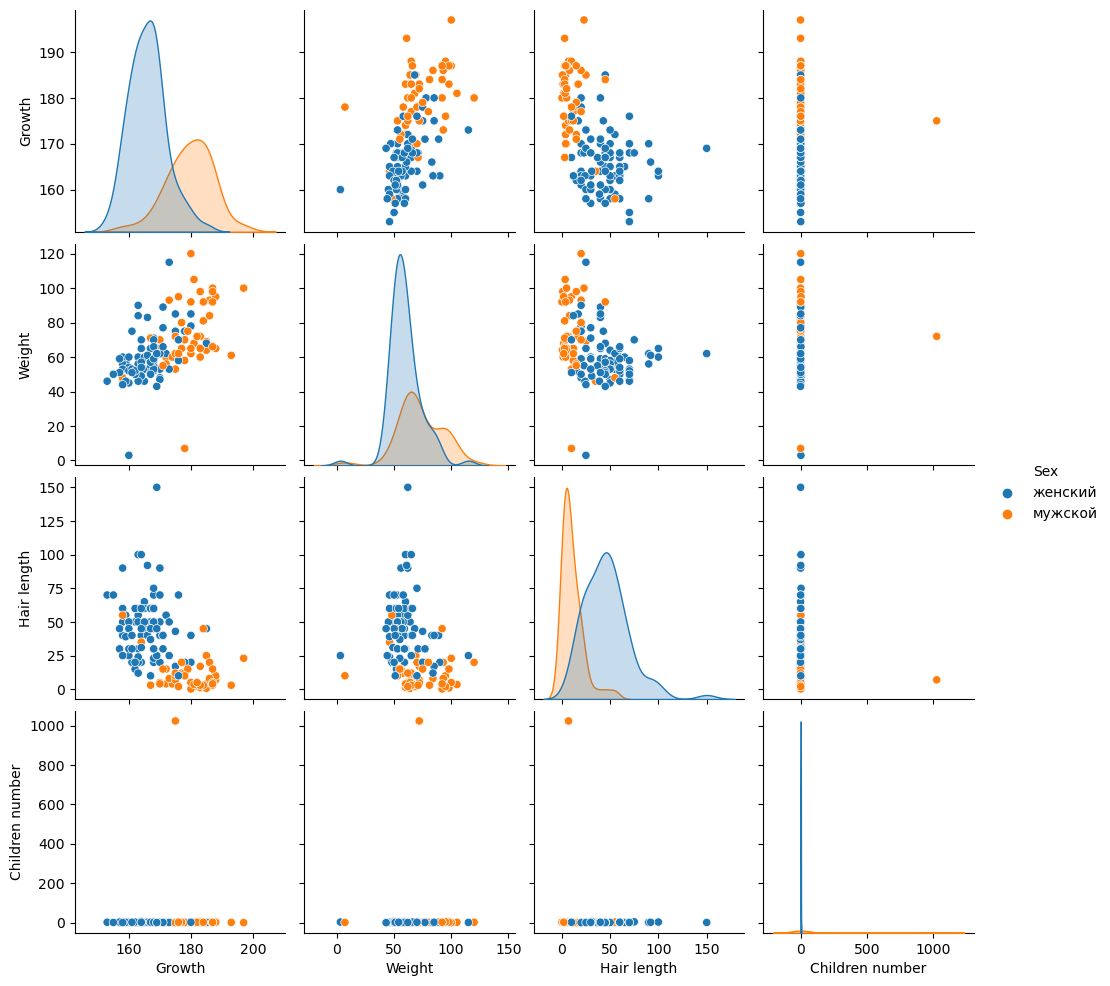

In [6]:
sns.pairplot(df_cut, hue="Sex")

In [15]:
model = tree.DecisionTreeClassifier()
model.fit(
    df_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    ),
    y=df_cut["Sex"].values,
)

DecisionTreeClassifier()

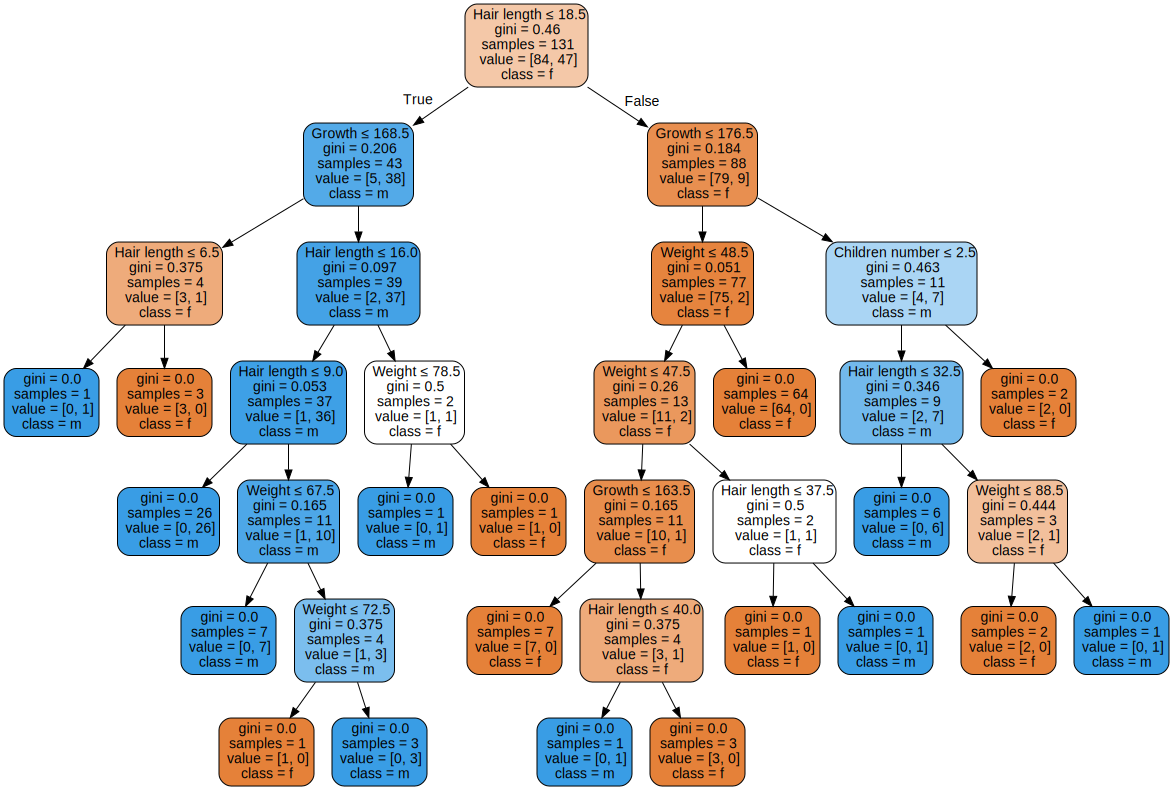

In [16]:
import graphviz

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=["Growth", "Weight", "Hair length", "Children number"],
    class_names=["f", "m"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [ ]:
tr = tree.DecisionTreeClassifier()
cols = ["Growth", "Weight", "Hair length", "Children number"]
tr.fit(df_cut[cols], df_cut["Sex"])
tree.plot_tree(tr, feature_names=cols, class_names=["женский", "мужской"], filled=True)

In [22]:
df_test = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv",
)
df_test_cut = (
    df_test[["Growth", "Weight", "Sex", "Hair length", "Children number"]]
    .copy()
    .dropna()
)

In [23]:
df_test_cut["Predicted_sex"] = model.predict(
    df_test_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    )
)

In [24]:
pd.crosstab(df_test_cut["Predicted_sex"], df_test_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,41,1
мужской,1,25


Так считаются метрики качества в задаче классификации

Есть два показателя: precision и recall. Их можно подсчитать для каждого класса.

**recall(для женщин)=доля правильно предсказанных женщин среди всех женщин**

В нашем примере: recall(для женщин)=40/(40+2)=0.9523809523809523

**recall(для мужчин)=доля правильно предсказанных мужчин среди всех мужчин**

В нашем примере: recall(для мужчин)=25/(25+1)=0.9615384615384616

**precision(для женщин)=доля истинных женщин среди людей, отнесенных ИИ к женщинам**

В нашем примере: precision(для женщин)=40/(40+1)=0.975609756097561

**precision(для мужчин)=доля истинных мужчин среди людей, отнесенных ИИ к мужчинам**

В нашем примере: precision(для мужчин)=25/(25+2)=0.9259259259259259



In [26]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test_cut["Sex"], df_test_cut["Predicted_sex"])

(array([0.97619048, 0.96153846]),
 array([0.97619048, 0.96153846]),
 array([0.97619048, 0.96153846]),
 array([42, 26], dtype=int64))

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeClassifier, указав максимальную глубину дерева равную 2.

In [67]:
df_cut = data[["Sex", "Hair length", "Shoe size"]].copy().dropna()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

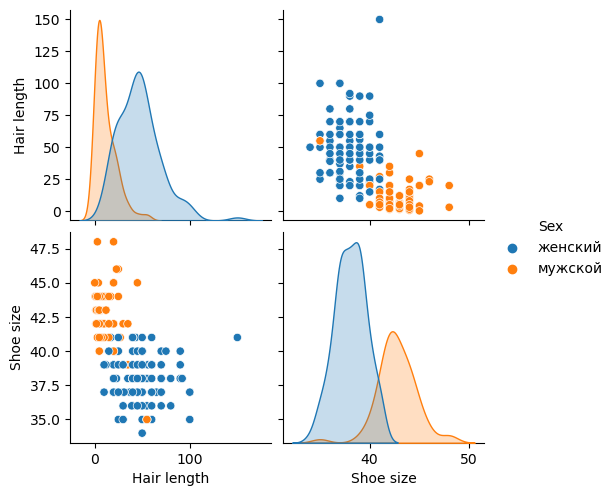

In [68]:
sns.pairplot(df_cut, hue="Sex")

In [75]:
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(
    df_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2),
    y=df_cut["Sex"].values,
)

DecisionTreeClassifier(max_depth=2)

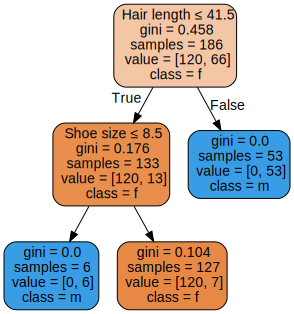

In [76]:
import graphviz

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=["Shoe size", "Hair length"],
    class_names=["f", "m"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [77]:
df_test = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv",
)
df_test_cut = df_test[["Sex", "Hair length", "Shoe size"]].copy().dropna()

In [78]:
df_test_cut["Predicted_sex"] = model.predict(
    df_test_cut[["Hair length", "Shoe size"]].values.reshape(-1, 2)
)

In [79]:
pd.crosstab(df_test_cut["Predicted_sex"], df_test_cut["Sex"])

Sex,женский,мужской
Predicted_sex,,
женский,61,2
мужской,1,34


In [80]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test_cut["Sex"], df_test_cut["Predicted_sex"])

(array([0.96825397, 0.97142857]),
 array([0.98387097, 0.94444444]),
 array([0.976     , 0.95774648]),
 array([62, 36], dtype=int64))

#### Задача регрессии

In [28]:
df_cut = data[["Growth", "Weight", "Hair length", "Shoe size"]].copy().dropna()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

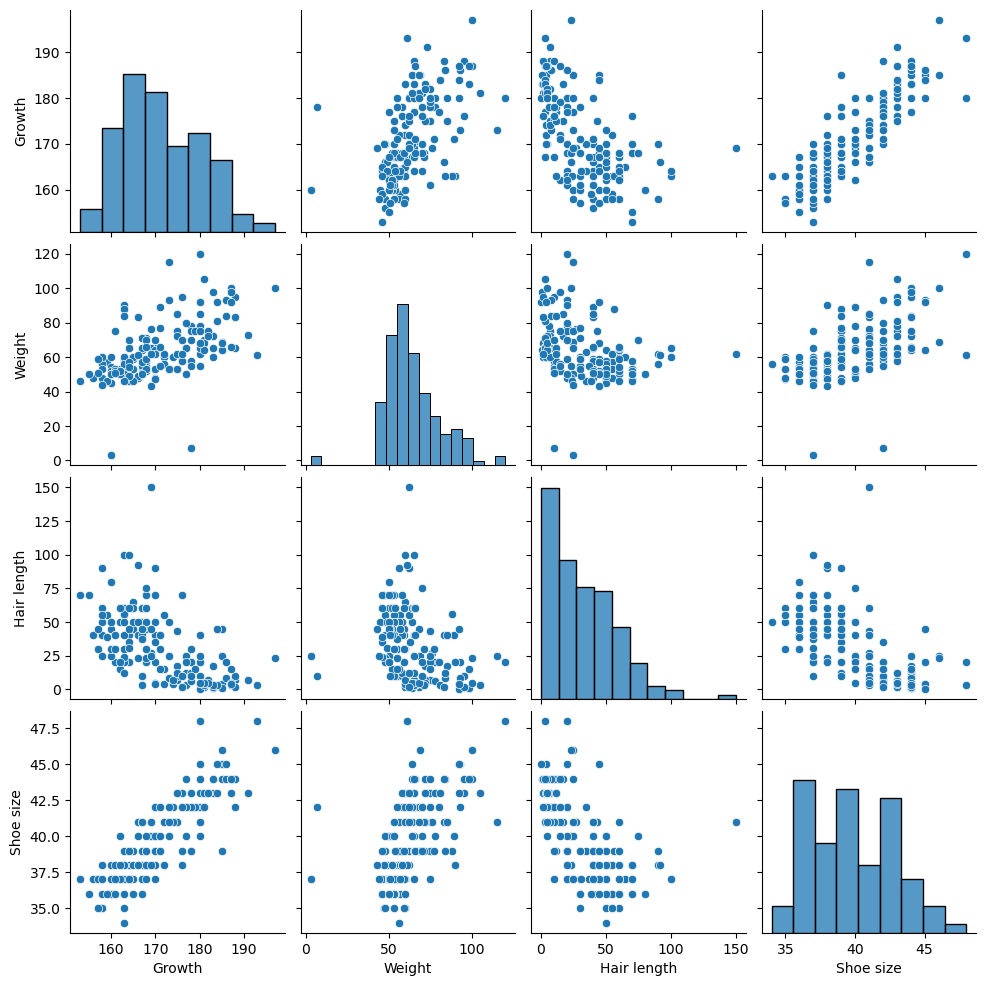

In [29]:
sns.pairplot(df_cut)

Гипотеза: угадать рост человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [51]:
model = tree.DecisionTreeRegressor(max_depth=2)
model.fit(
    df_cut[["Weight", "Hair length", "Shoe size"]].values.reshape(-1, 3),
    y=df_cut["Growth"].values,
)

DecisionTreeRegressor(max_depth=2)

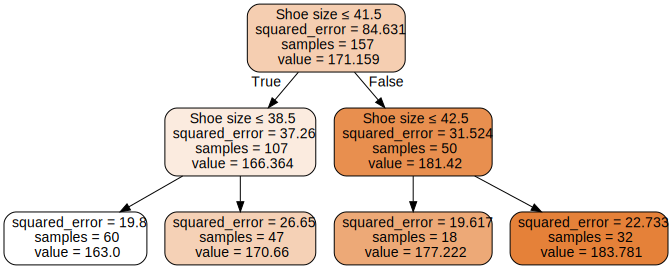

In [52]:
import graphviz

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=["Weight", "Hair length", "Shoe size"],
    class_names=["Growths"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [53]:
df_test = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv",
)
df_test_cut = df_test[["Growth", "Weight", "Hair length", "Shoe size"]].copy().dropna()

In [54]:
df_test_cut["Predicted"] = model.predict(
    df_test_cut[["Weight", "Hair length", "Shoe size"]].values.reshape(-1, 3)
)

In [55]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test_cut["Growth"], df_test_cut["Predicted"])

4.351558902090816

Будем по признакам 'Year of birth', 'Month of birthday' предсказывать признак 'Age'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeRegressor, установив максимальную глубину дерева 3. Чему равно заштрихованное число в корне построенного дерева?

In [94]:
df_cut = data[["Year of birth", "Month of birthday", "Age"]].copy().dropna()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


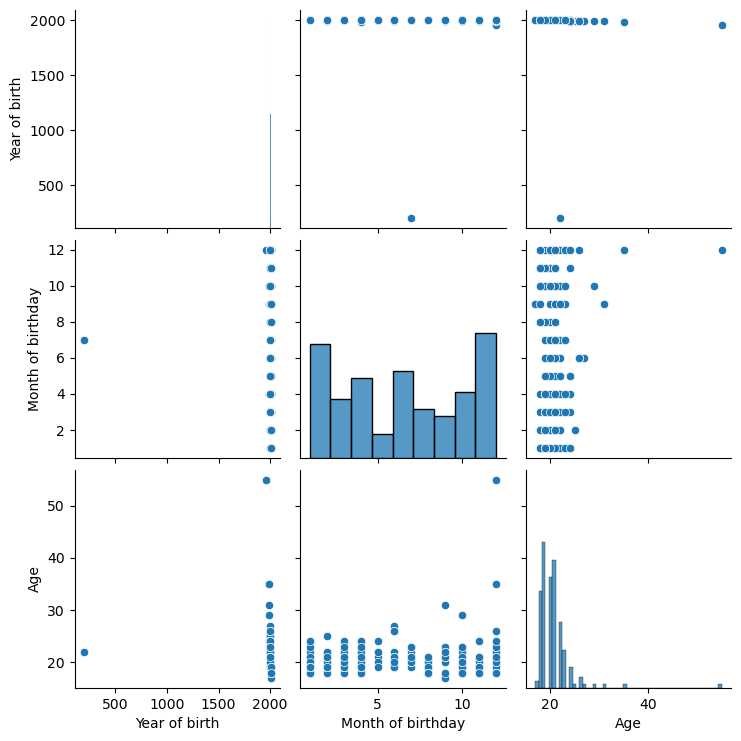

In [95]:
sns.pairplot(df_cut)

In [101]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(
    df_cut[["Year of birth", "Month of birthday"]].values.reshape(-1, 2),
    y=df_cut["Age"].values,
)

DecisionTreeRegressor(max_depth=3)

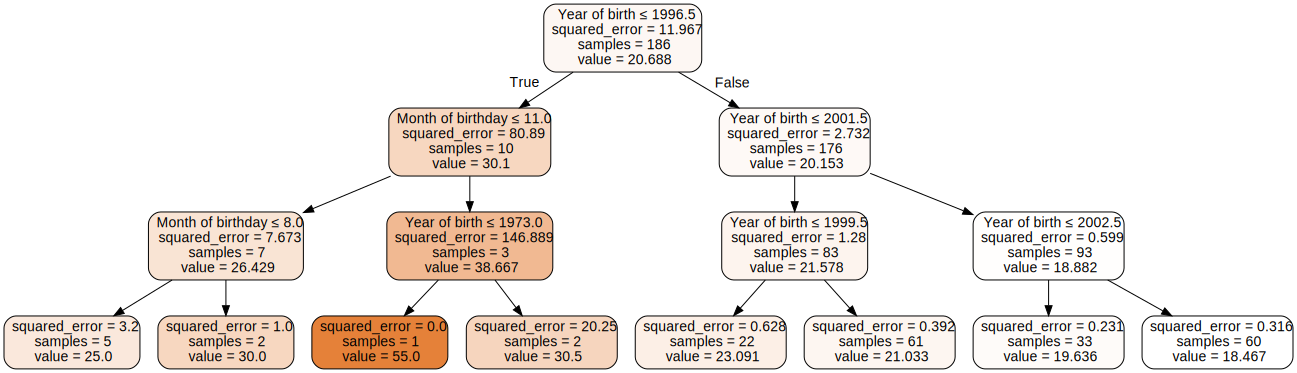

In [102]:
import graphviz

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=["Year of birth", "Month of birthday"],
    class_names=["Age"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [165]:
df_test = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv",
)
df_test_cut = df_test[["Year of birth", "Month of birthday", "Age"]].copy().dropna()

In [104]:
df_test_cut["Predicted"] = model.predict(
    df_test_cut[["Year of birth", "Month of birthday"]].values.reshape(-1, 2)
)

In [105]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test_cut["Age"], df_test_cut["Predicted"])

0.7241329318612689

### 5.2 Бустинг и ансамбли алгоритмов

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
df_cut = data[["Growth", "Weight", "Sex", "Hair length", "Children number"]]
df_cut = df_cut.dropna()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

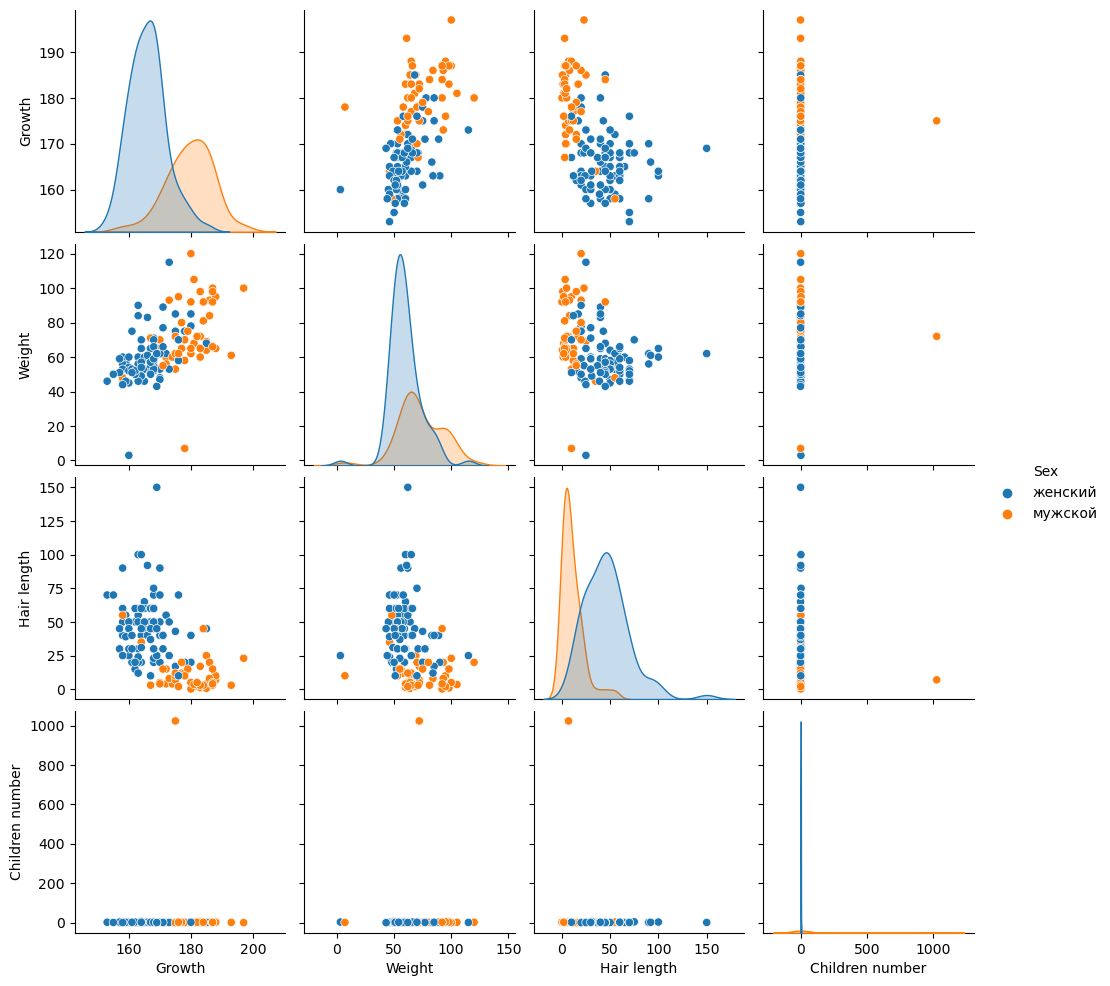

In [109]:
sns.pairplot(df_cut, hue='Sex')

In [110]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(
    df_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    ),
    y=df_cut["Sex"].values,
)

RandomForestClassifier(max_depth=2, random_state=0)

In [111]:
df_test_cut = df_test[["Growth", "Weight", "Sex", "Hair length", "Children number"]]
df_test_cut = df_test_cut.dropna()

In [112]:
df_test_cut["Predicted"] = model.predict(
    df_test_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    )
)

In [113]:
pd.crosstab(df_test_cut["Predicted"], df_test_cut["Sex"])

Sex,женский,мужской
Predicted,,
женский,42,1
мужской,0,25


In [114]:
df_test_cut["Code"] = "0"
df_test_cut.loc[
    (df_test_cut["Sex"] == "мужской") & (df_test_cut["Predicted"] == "женский"), "Code"
] = "1"
df_test_cut.loc[
    (df_test_cut["Sex"] == "женский") & (df_test_cut["Predicted"] == "мужской"), "Code"
] = "2"

In [115]:
# Кто же он, человек сломавший Random Forest?
df_test_cut[df_test_cut["Code"] == "1"]

,Growth,Weight,Sex,Hair length,Children number,Predicted,Code
78,175.0,50.0,мужской,40.0,2.0,женский,1


#### Градиентный бустинг

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
df_cut = data[["Growth", "Weight", "Sex", "Hair length", "Children number"]]
df_cut = df_cut.dropna()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

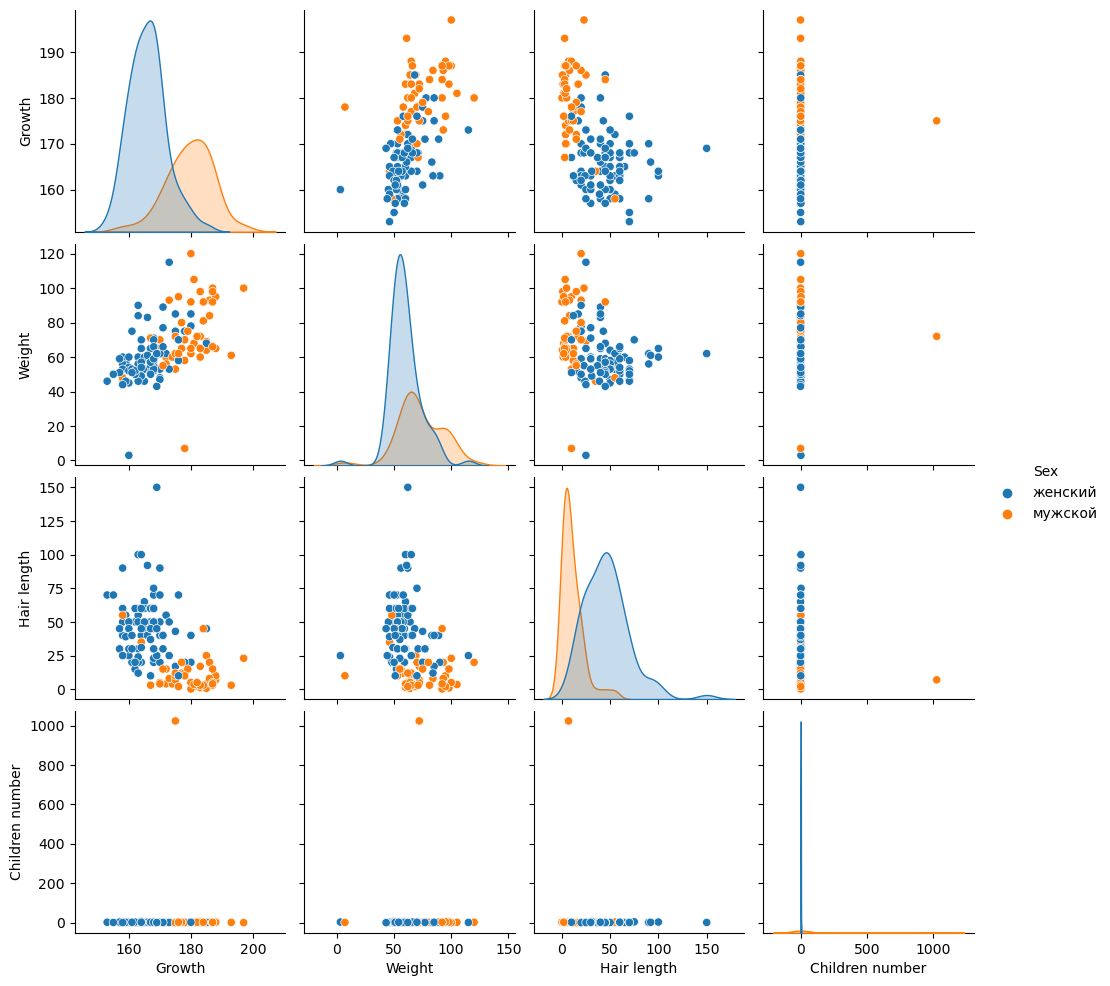

In [118]:
sns.pairplot(df_cut, hue='Sex')

In [119]:
model = GradientBoostingClassifier(random_state=0)
model.fit(
    df_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    ),
    y=df_cut["Sex"].values,
)

GradientBoostingClassifier(random_state=0)

In [120]:
df_test_cut = df_test[["Growth", "Weight", "Sex", "Hair length", "Children number"]]
df_test_cut = df_test_cut.dropna()

In [121]:
df_test_cut["Predicted"] = model.predict(
    df_test_cut[["Growth", "Weight", "Hair length", "Children number"]].values.reshape(
        -1, 4
    )
)

In [122]:
pd.crosstab(df_test_cut["Predicted"], df_test_cut["Sex"])

Sex,женский,мужской
Predicted,,
женский,42,1
мужской,0,25


In [123]:
precision_recall_fscore_support(df_test_cut["Sex"], df_test_cut["Predicted"])

(array([0.97674419, 1.        ]),
 array([1.        , 0.96153846]),
 array([0.98823529, 0.98039216]),
 array([42, 26], dtype=int64))

Будем предсказывать институт, где учится студент (признак "Your unstitute") по баллам, на которые он написал ЕГЭ. Баллы за ЕГЭ занимают в нашей таблице столбцы с номерами 6-16. Чтобы из исходной таблицы выбрать только указанные столбцы нужно выполнить команду df_test.iloc[:,6:17] - это и будет таблица, в которой остались только столбцы с результатами ЕГЭ.

Натренируйте модель RandomForestClassifier(max_depth=4, random_state=0) для предсказания признака "Your unstitute" и запустите ее на тестовой выборке student_test.csv

In [147]:
df_cut = data.iloc[:, 6:17].copy()
df_cut["Your insitute"] = data["Your insitute"]
df_cut

,Russian rating,Maths rating,Physics rating,Computer science rating,Chemistry rating,Literature rating,History rating,Geography rating,Biology rating,Foreign language rating,Social science rating,Your insitute
0,85,86,0,84,0,0,0,0,0,0,0,Математический и ИТ
1,69,74,64,72,0,0,0,0,0,0,0,Математический и ИТ
2,78,62,0,0,0,0,0,0,0,0,70,Другое
3,72,0,0,0,0,0,98,0,0,0,91,Юридический
4,0,0,0,0,0,0,0,0,0,0,0,Педагогический
...,...,...,...,...,...,...,...,...,...,...,...,...
181,93,68,0,0,0,0,0,0,82,0,0,Естественный (биология-химия-физика-технари)
182,73,5,0,0,0,0,83,0,0,63,0,СоцГум
183,98,0,0,0,0,0,0,0,56,0,65,Другое
184,82,86,0,0,0,0,0,0,0,0,75,Математический и ИТ


In [156]:
model = GradientBoostingClassifier(random_state=0)
model.fit(df_cut.iloc[:, :11].values.reshape(-1, 11), y=df_cut["Your insitute"].values)

GradientBoostingClassifier(random_state=0)

In [157]:
df_test_cut=df_test.iloc[:, 6:17].copy()
df_test_cut["Your insitute"] = df_test["Your insitute"]
df_test_cut=df_test_cut.dropna()

In [158]:
df_test_cut["Predicted"] = model.predict(df_test_cut.iloc[:, :11].values.reshape(-1, 11))

In [159]:
pd.crosstab(df_test_cut["Predicted"], df_test_cut["Your insitute"])

Your insitute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
Predicted,,,,,,,
Другое,1,3,0,1,1,0,0
Естественный (биология-химия-физика-технари),3,10,0,2,0,0,0
Математический и ИТ,1,7,30,3,0,8,0
Педагогический,1,3,3,1,1,2,0
СоцГум,0,0,2,0,7,0,0
Экономический,1,0,1,1,0,3,1
Юридический,0,0,0,0,0,0,1


### 5.3 Вероятностные алгоритмы

Загрузите данные 

df_cut=df[['Growth','Weight','Sex']]

df_cut=df_cut.dropna()

Создайте модель искусственного интеллекта:

model = RandomForestClassifier(max_depth=2, random_state=0)

Обучите ее на данных df_cut. Соберите предсказания для студентов из файла students_test.csv

Узнайте, за принадлежность какому полу отвечают вероятности "pr class 0", "pr class 1". 

Отсортируйте таблицу по убыванию признака "pr class 1". Какой рост имеет самый верхний элемент в отсортированной таблице? Впишите его в ответ.

In [160]:
df_cut = data[["Growth", "Weight", "Sex"]].copy().dropna()

In [161]:
model = RandomForestClassifier(max_depth=2, random_state=0)

In [162]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[["Growth", "Weight"]].values.reshape(-1, 2), y=df_cut["Sex"].values)

RandomForestClassifier(max_depth=2, random_state=0)

In [166]:
df_test = pd.read_csv(
    "https://stepik.org/media/attachments/lesson/802417/students_test.csv",
)

In [167]:
df_test_cut = df_test[["Growth", "Weight", "Sex"]].copy().dropna()

In [168]:
result = model.predict_proba(df_test_cut[["Growth", "Weight"]].values.reshape(-1, 2))
print(result)  # это вероятности принадлежности классам

[[0.2228249  0.7771751 ]
 [0.93908395 0.06091605]
 [0.23335577 0.76664423]
 [0.92944526 0.07055474]
 [0.08504974 0.91495026]
 [0.92544526 0.07455474]
 [0.20091285 0.79908715]
 [0.92186937 0.07813063]
 [0.92944526 0.07055474]
 [0.43384633 0.56615367]
 [0.197871   0.802129  ]
 [0.23780182 0.76219818]
 [0.27669726 0.72330274]
 [0.39363085 0.60636915]
 [0.23846582 0.76153418]
 [0.94315003 0.05684997]
 [0.94033903 0.05966097]
 [0.9207692  0.0792308 ]
 [0.1964668  0.8035332 ]
 [0.24043963 0.75956037]
 [0.08504974 0.91495026]
 [0.93108629 0.06891371]
 [0.19384485 0.80615515]
 [0.09059743 0.90940257]
 [0.08504974 0.91495026]
 [0.19042628 0.80957372]
 [0.92175953 0.07824047]
 [0.75140142 0.24859858]
 [0.28935708 0.71064292]
 [0.08504974 0.91495026]
 [0.17770458 0.82229542]
 [0.75515361 0.24484639]
 [0.92175953 0.07824047]
 [0.941509   0.058491  ]
 [0.79872237 0.20127763]
 [0.93908395 0.06091605]
 [0.92575581 0.07424419]
 [0.83368832 0.16631168]
 [0.19536515 0.80463485]
 [0.197871   0.802129  ]


In [171]:
df_test_cut['pr class 0']=result[:,0]
df_test_cut['pr class 1']=result[:,1]
df_test_cut.sort_values(by='pr class 0', ascending=False)

,Growth,Weight,Sex,pr class 0,pr class 1
61,162.0,49.0,женский,0.943150,0.056850
79,162.0,49.0,женский,0.943150,0.056850
17,159.0,49.0,женский,0.943150,0.056850
52,160.0,50.0,женский,0.943080,0.056920
39,157.0,49.0,женский,0.941509,0.058491
...,...,...,...,...,...
57,186.0,100.0,мужской,0.085050,0.914950
33,196.0,97.0,мужской,0.085050,0.914950
28,193.0,105.0,мужской,0.085050,0.914950
23,194.0,97.0,мужской,0.085050,0.914950


### 5.4 Селекция признаков

In [179]:
from sklearn import preprocessing
coder = preprocessing.LabelEncoder()

In [186]:
from sklearn.ensemble import ExtraTreesClassifier

selector=ExtraTreesClassifier()

In [202]:
data_ = data.copy().dropna()

In [203]:
object_col = [col for col in data_.columns if data_[col].dtype==object]
object_col

['Glasses',
 'Sex',
 'Problems in last semester',
 'Coin',
 'Rock paper scissors',
 'Animal',
 'Your rating in university',
 'Fastfood',
 'Army',
 'Hostel',
 'Chocolate',
 'Strange people',
 'Your insitute',
 'Brother-sister',
 'Plane seat']

In [204]:
for name in object_col:
    coder.fit(data_[name])
    data_[name] = coder.transform(data_[name])

In [205]:
result = selector.fit(data_[data_.columns], data_["Your insitute"])

result.feature_importances_

array([0.01137005, 0.01621822, 0.01303511, 0.01151702, 0.01019933,
       0.02024071, 0.01266028, 0.05978764, 0.00983661, 0.0868923 ,
       0.01041255, 0.03192637, 0.04667502, 0.01298017, 0.0161759 ,
       0.0197466 , 0.0606059 , 0.01109047, 0.01216746, 0.01368569,
       0.00849152, 0.01399086, 0.01097917, 0.01900703, 0.00518899,
       0.01365455, 0.00894858, 0.0097904 , 0.01094326, 0.00679605,
       0.01045872, 0.0148711 , 0.01823208, 0.01769926, 0.00794647,
       0.00500047, 0.016052  , 0.01159772, 0.01498571, 0.01719747,
       0.01073112, 0.01215982, 0.19513081, 0.00755242, 0.01120943,
       0.01266479, 0.01071367, 0.01078313])

In [206]:
features_table = pd.DataFrame(
    result.feature_importances_, index=data_.columns, columns=["importance"]
)
print(features_table)

                             importance
Age                            0.011370
Growth                         0.016218
Shoe size                      0.013035
Course number                  0.011517
Year of birth                  0.010199
Friend number                  0.020241
Russian rating                 0.012660
Maths rating                   0.059788
Physics rating                 0.009837
Computer science rating        0.086892
Chemistry rating               0.010413
Literature rating              0.031926
History rating                 0.046675
Geography rating               0.012980
Biology rating                 0.016176
Foreign language rating        0.019747
Social science rating          0.060606
Distance to home km            0.011090
Minutes to first class         0.012167
Children number                0.013686
Removed teeth                  0.008492
Weight                         0.013991
Glasses                        0.010979
Sex                            0.019007


In [207]:
features_table.loc[['Maths rating'], :]

,importance
Maths rating,0.059788
